# Project Customer Segmentation 


### problem statement

Customer segmentation is the problem of uncovering information about a firm's customer base.based on their interactions with the business.IN most cases this interaction is in itms of their purchase behavior and problem. We explore some of the ways. in this can be used.


you own the mall and want to understand the xustomers like who can be eaily converge[terget Customer] so that the sense can be given to marketing team and plan the strategy according.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mall customer.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

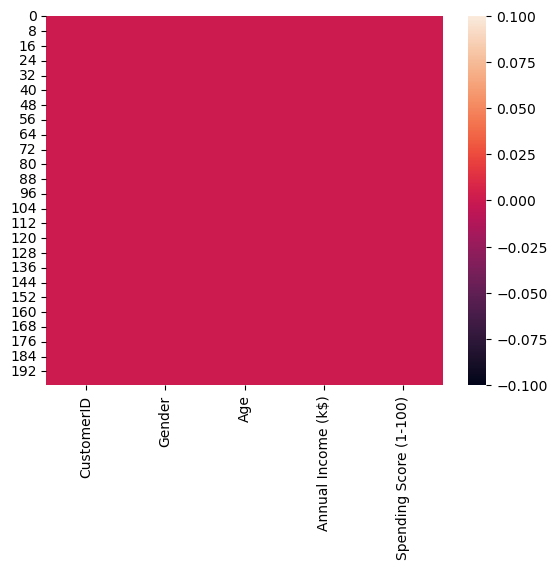

In [8]:
# in graph we check null values using heatmap
sns.heatmap(df.isnull())

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [10]:
# this library use to check missing value of each collumn

import missingno as msno

<Axes: >

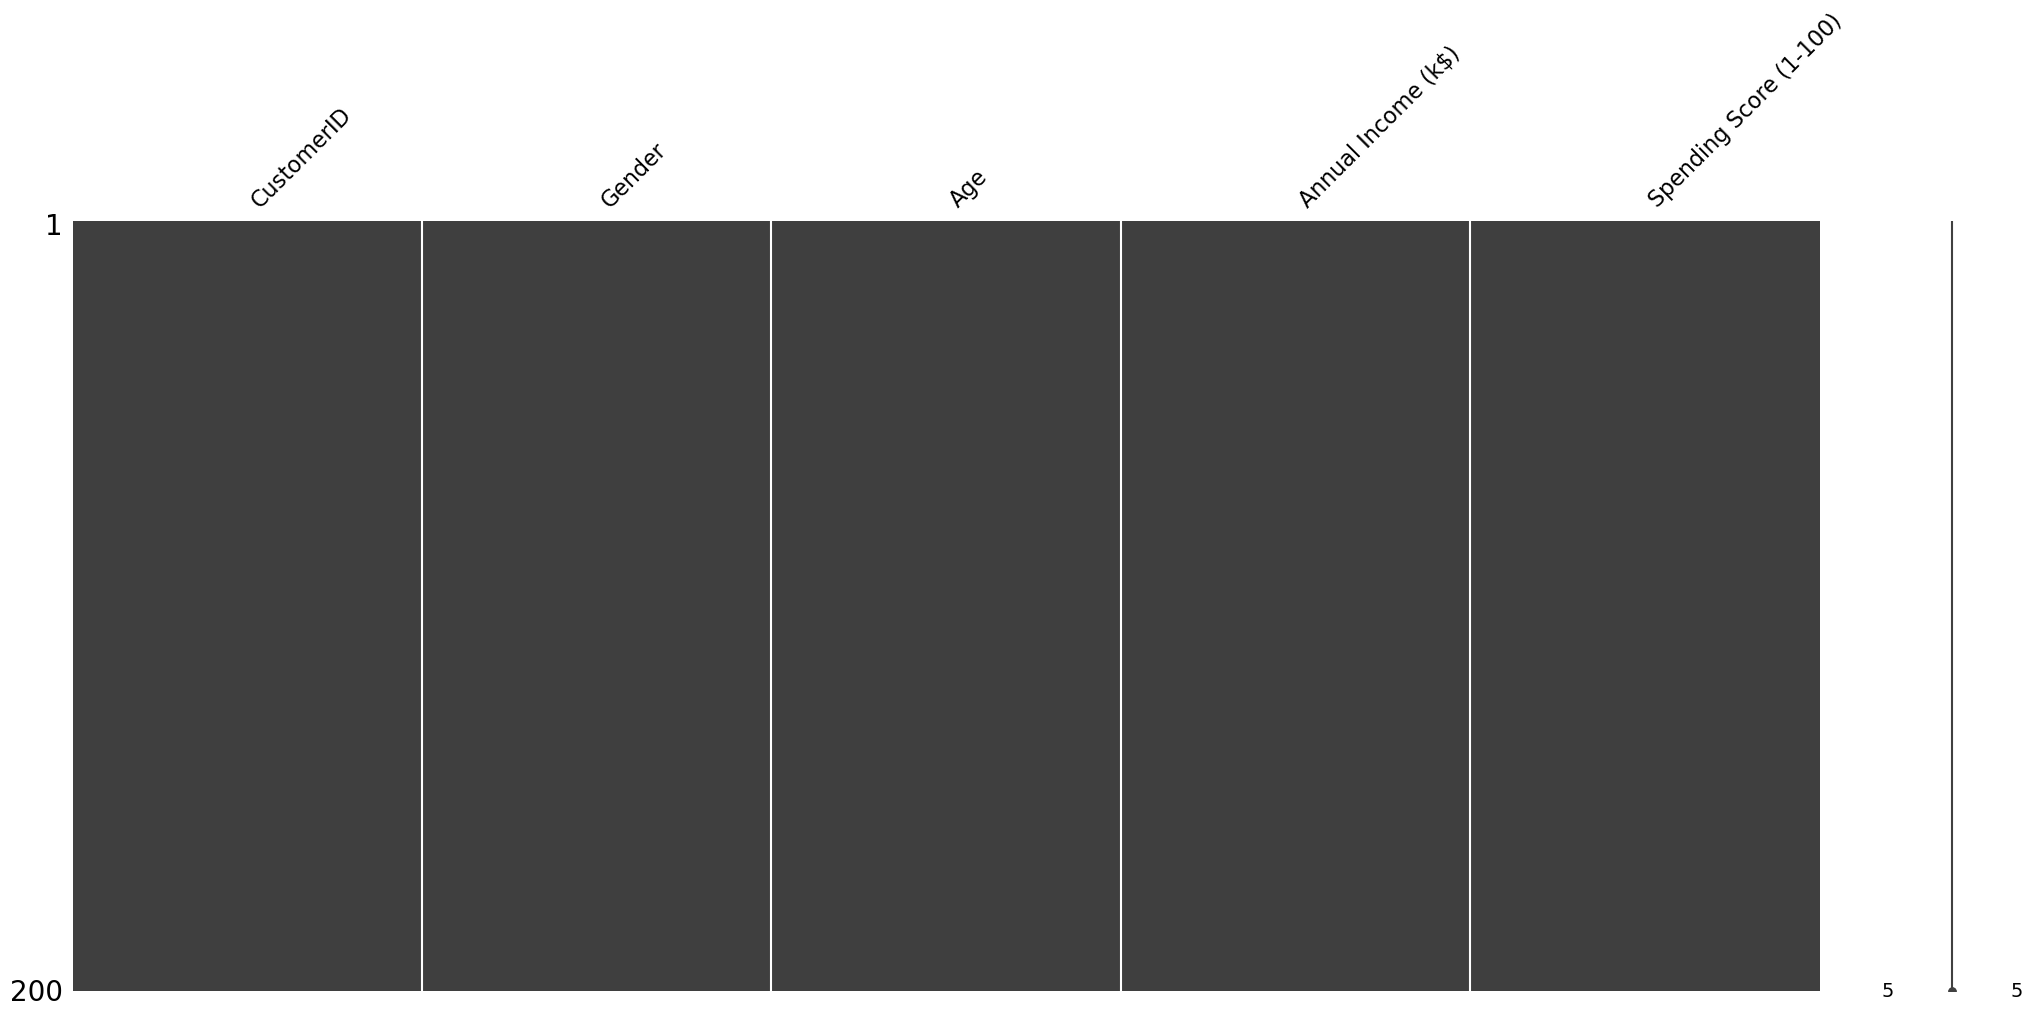

In [11]:
msno.matrix(df)

#### now Data Visualization and EDA (exploratry data analysis)

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\Ashutosh Rawat\AppData\Local\Temp\ipykernel_25436\1449132034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\Ashutosh Rawat\AppData\Local\Temp\ipykernel_25436\1449132034.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])
C:\Users\Ashuto

Text(0, 0.5, 'count')

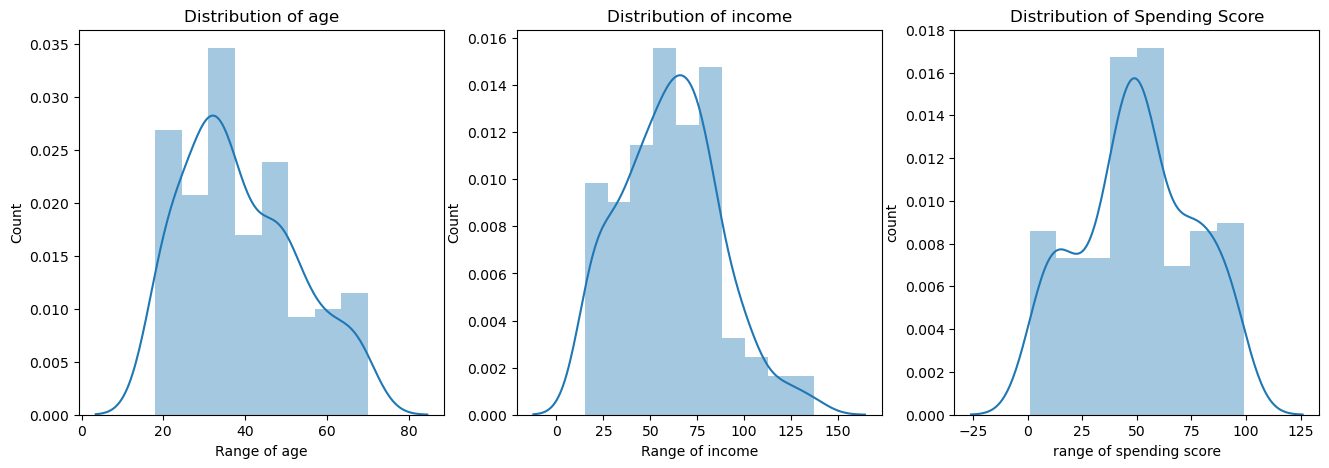

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.xlabel("Range of age")
plt.ylabel('Count')
plt.title('Distribution of age')

plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of income')
plt.xlabel('Range of income')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.xlabel('range of spending score')
plt.ylabel('count')

#plt.show()

In [14]:
df.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

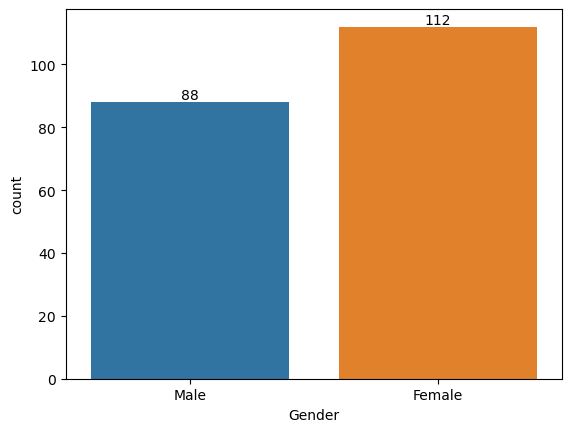

In [35]:
# how many male and female 

ap=sns.countplot(x='Gender',data=df)

for bars in ap.containers:
    ap.bar_label(bars)
   

Text(0.5, 1.0, 'Age Distribution')

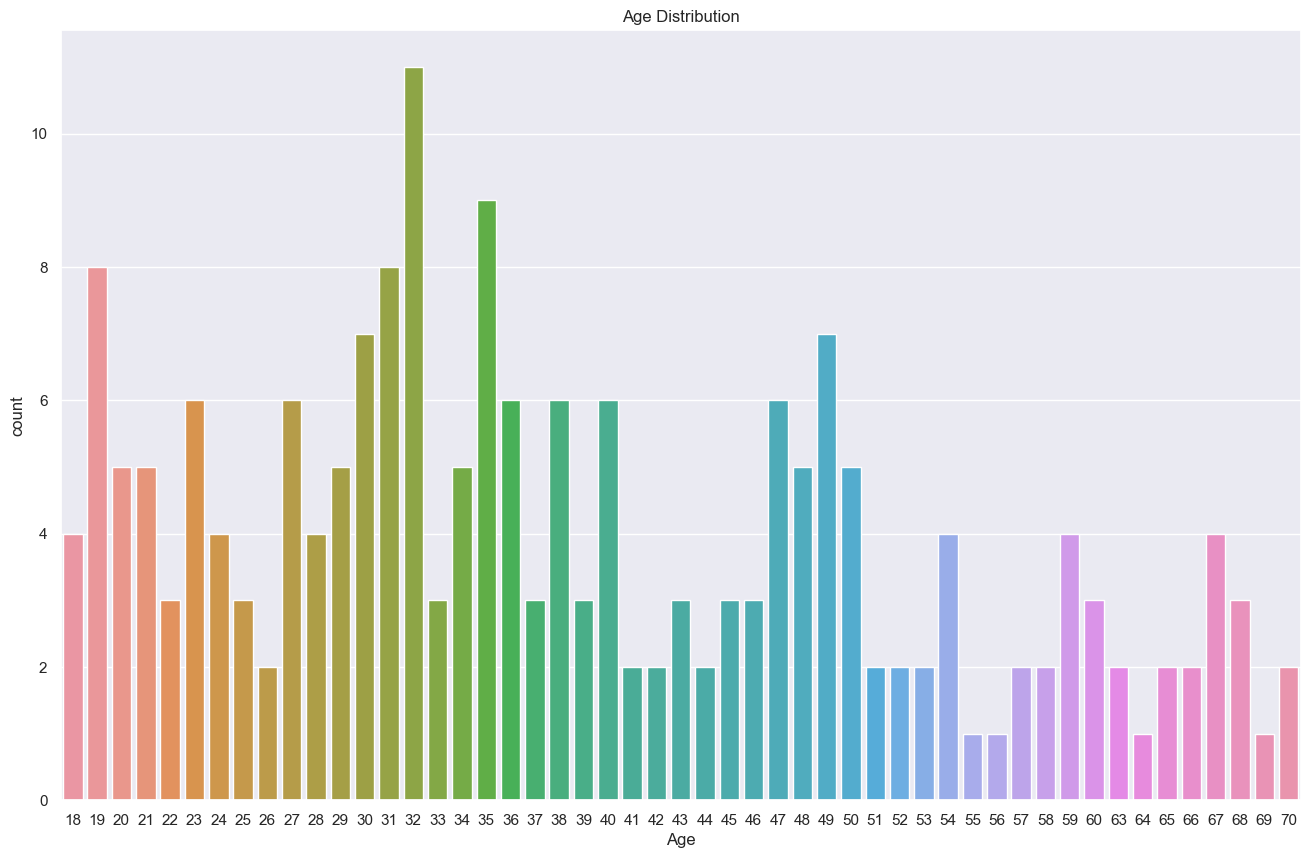

In [52]:
sns.countplot(x='Age',data=df)
sns.set(rc={'figure.figsize':(16,10)})
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income (k$) Distribution')

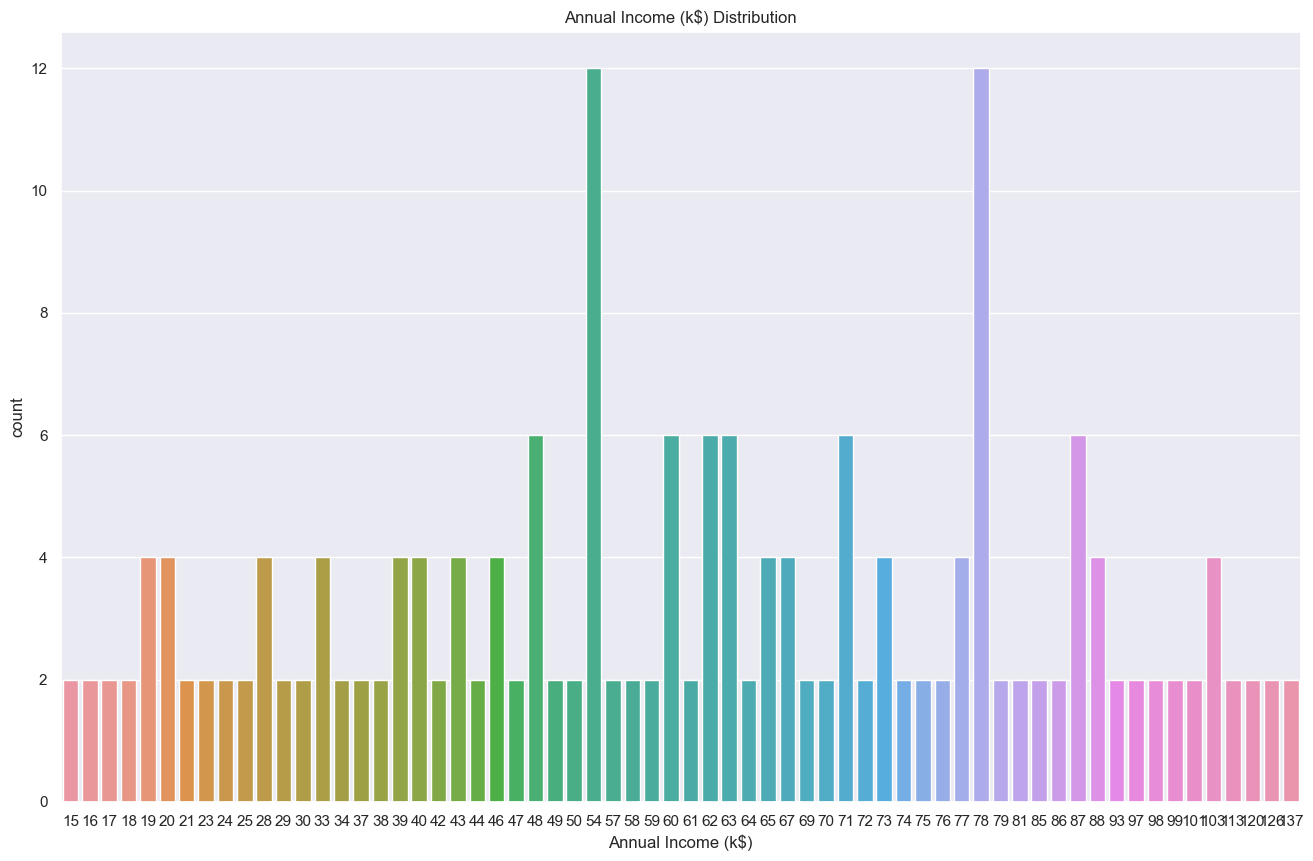

In [121]:
sns.countplot(x='Annual Income (k$)',data=df)
sns.set(rc={'figure.figsize':(16,10)})
plt.title('Annual Income (k$) Distribution')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

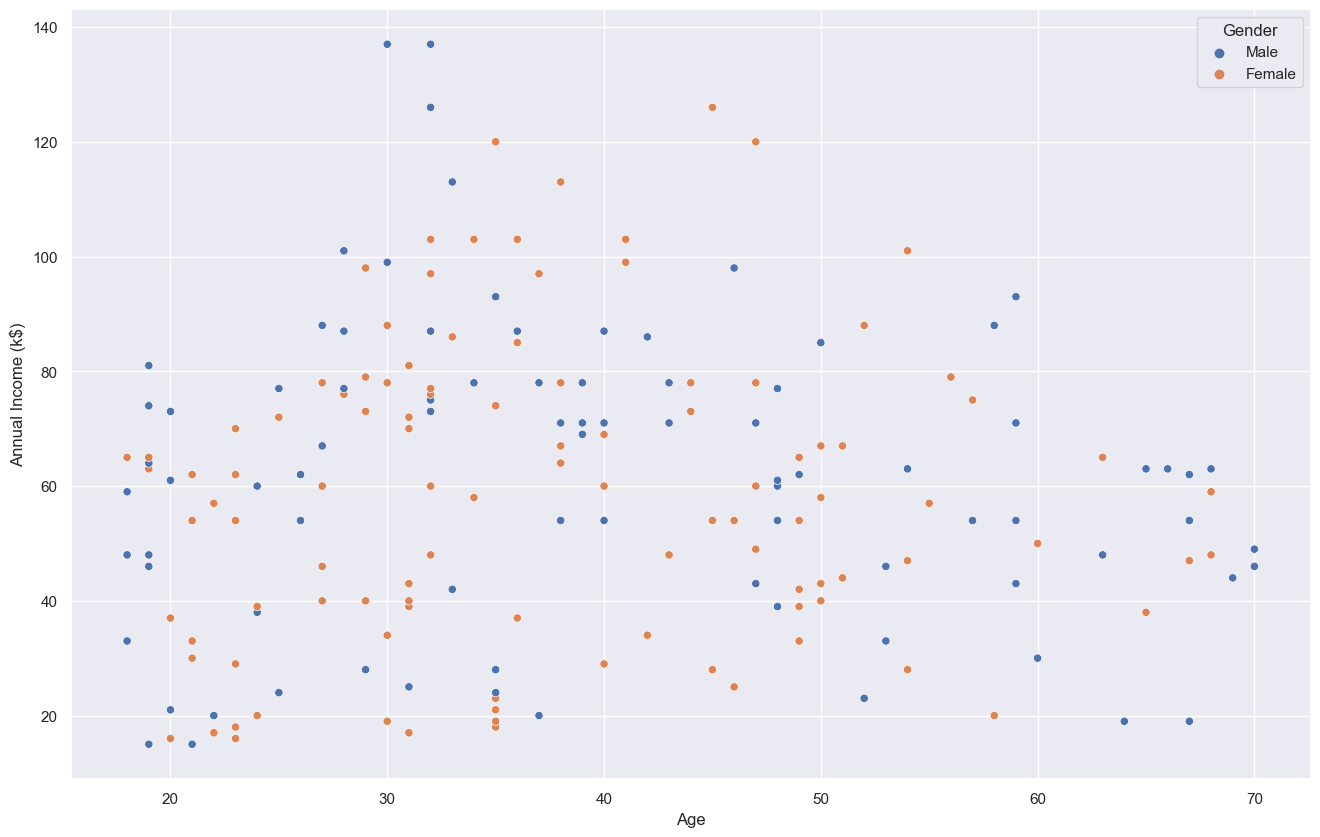

In [53]:
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df,hue='Gender')

In [54]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

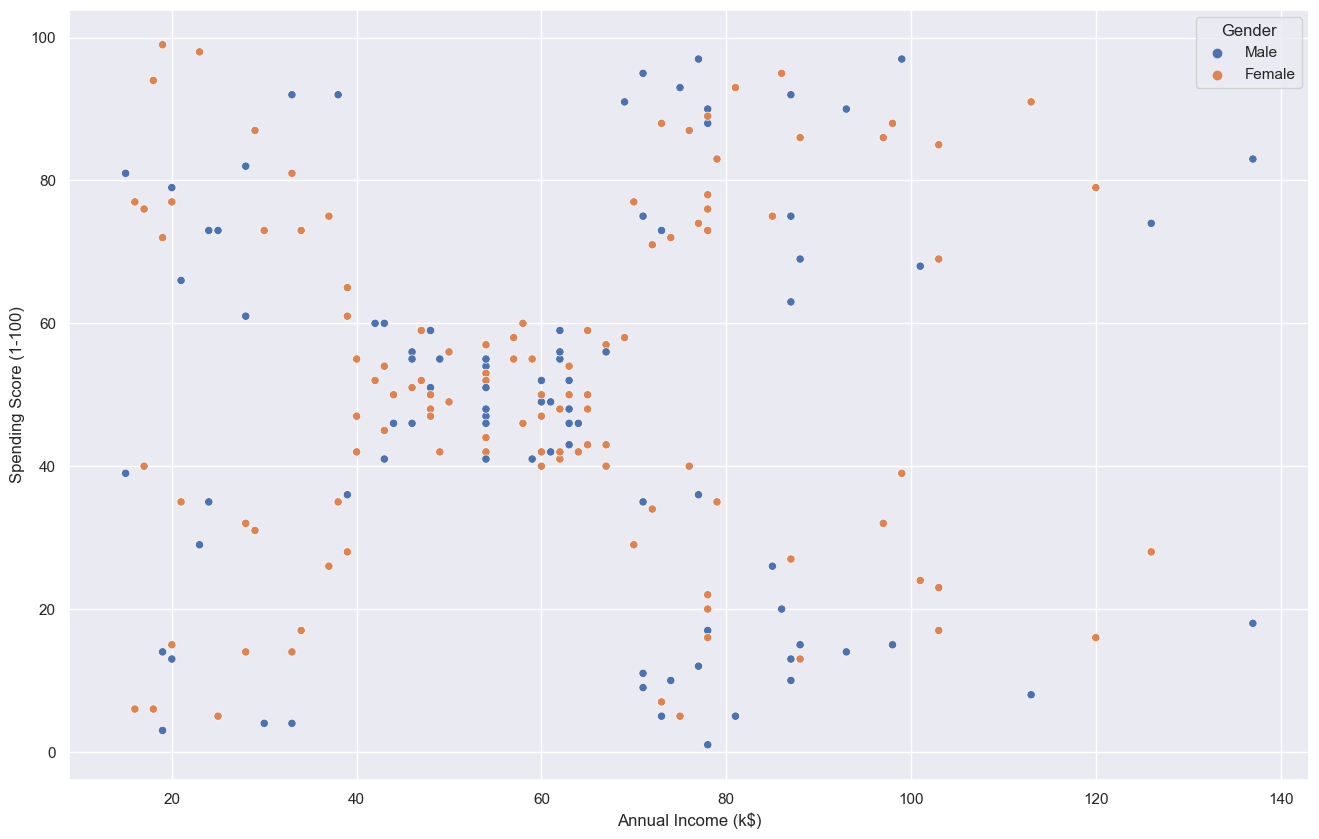

In [56]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Gender')

### K-Means Clustering

In [57]:
 from sklearn.cluster import KMeans

In [59]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [61]:
x=df.iloc[:,[3,4]].values

In [62]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

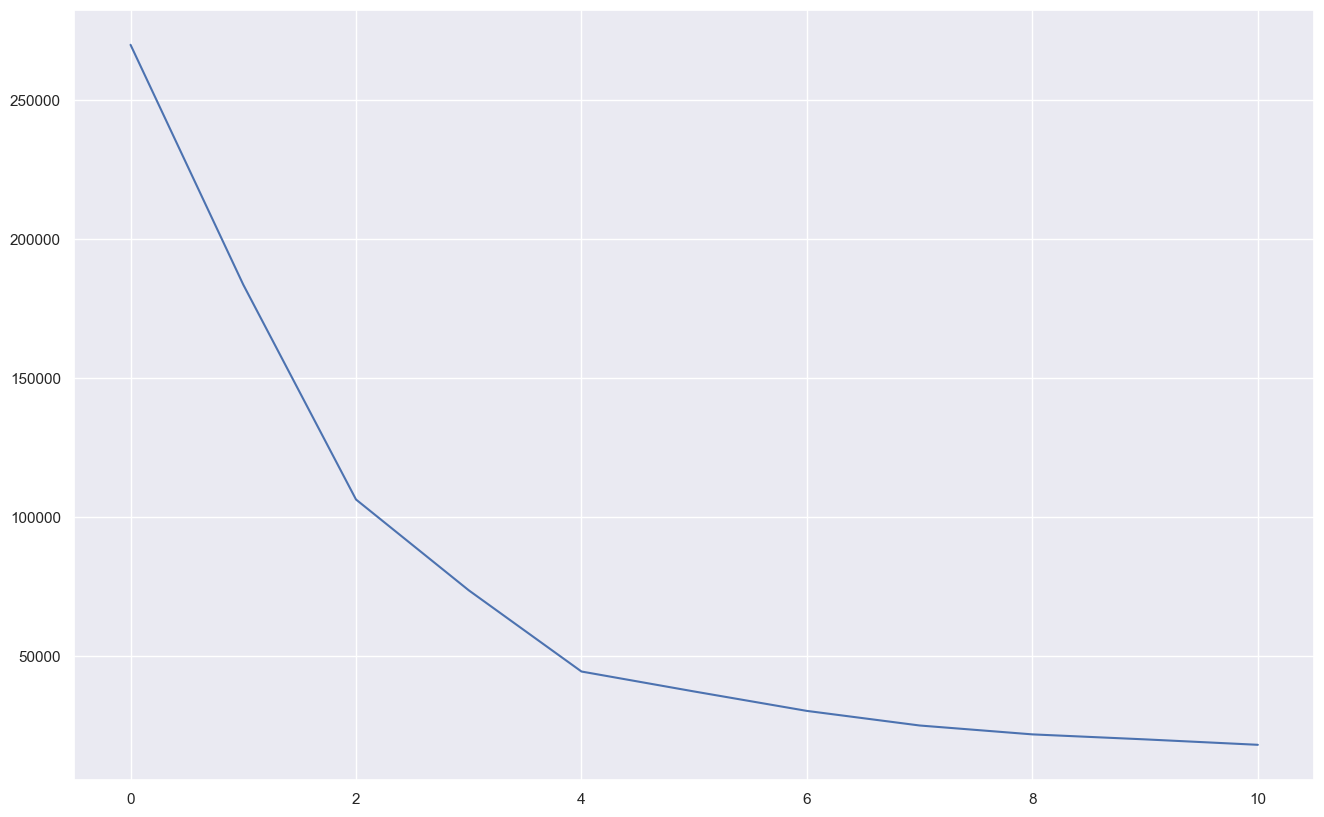

In [69]:

ssd=[]
range_n_clusters=[1,2,3,4,5,6,7,8,9,10,11]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(x)
    
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [106]:

kmeans=KMeans(n_clusters=4,max_iter=300)
y_kmeans=kmeans.fit_predict(x)


C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [107]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

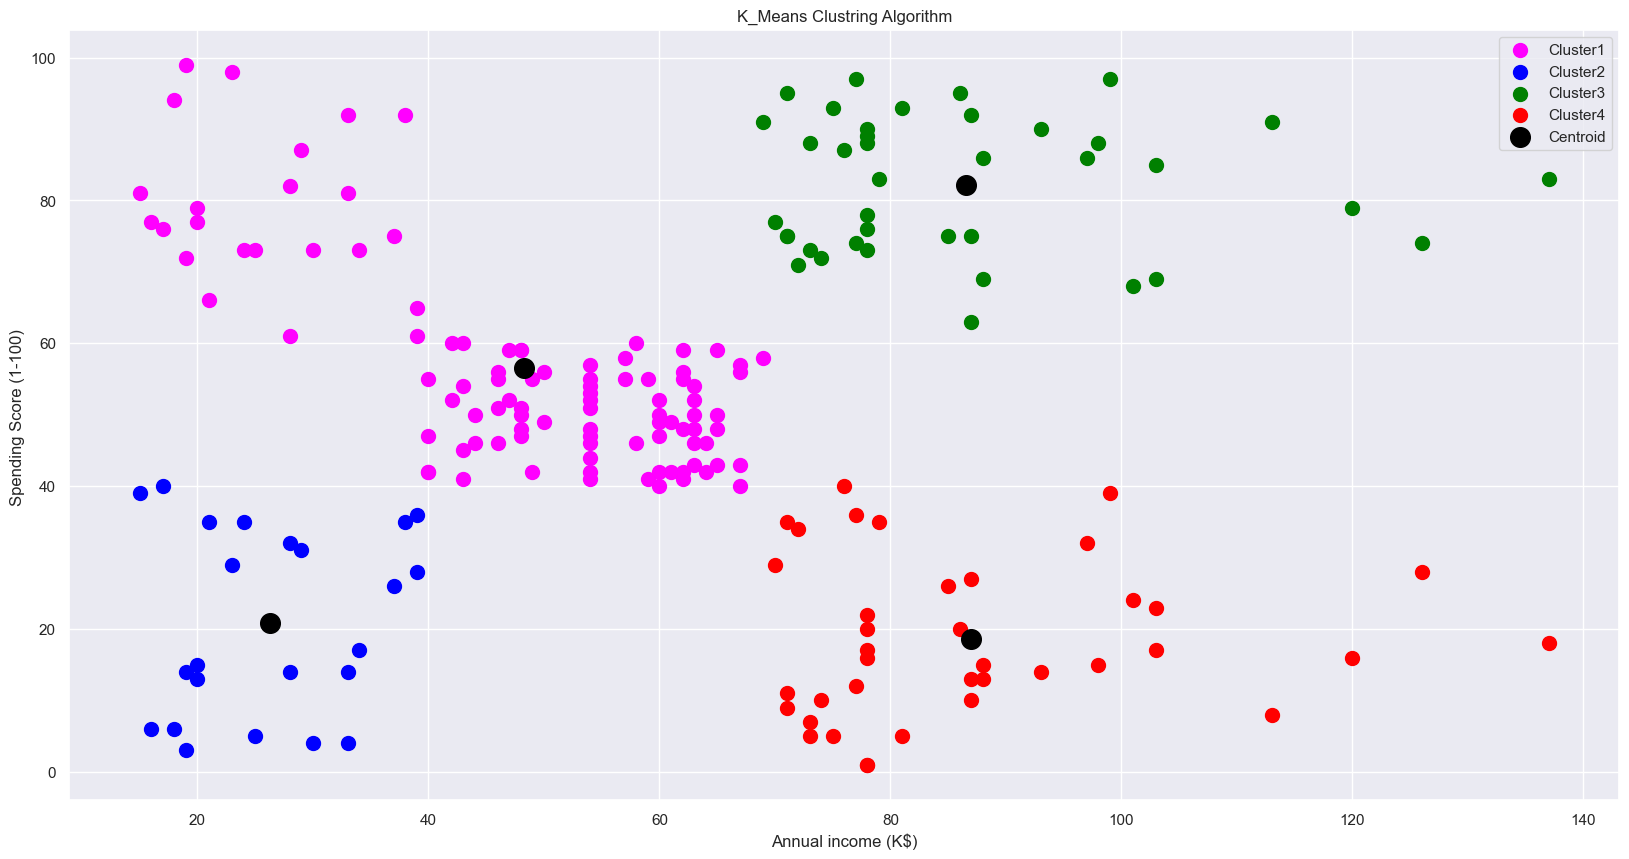

In [119]:

plt.figure(figsize=(20,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='magenta',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green',label='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='red',label='Cluster4')
#plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='cyan',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.legend()
plt.title('K_Means Clustring Algorithm')
plt.xlabel('Annual income (K$)')
plt.ylabel('Spending Score (1-100) ')
plt.show()           
    